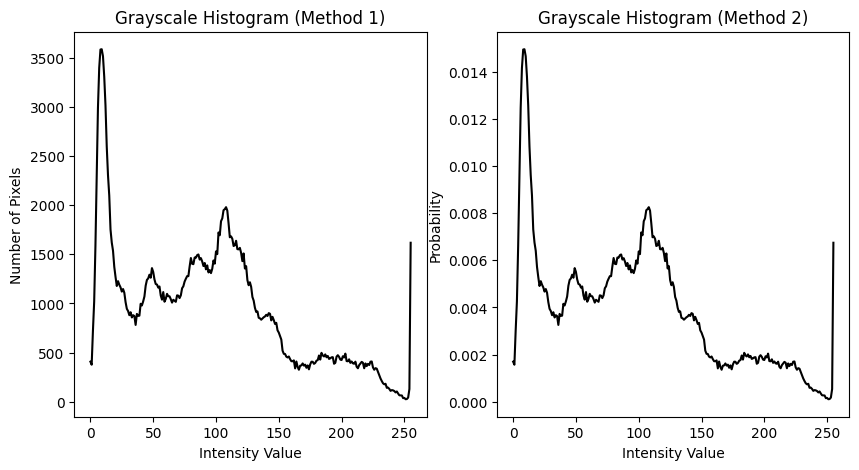

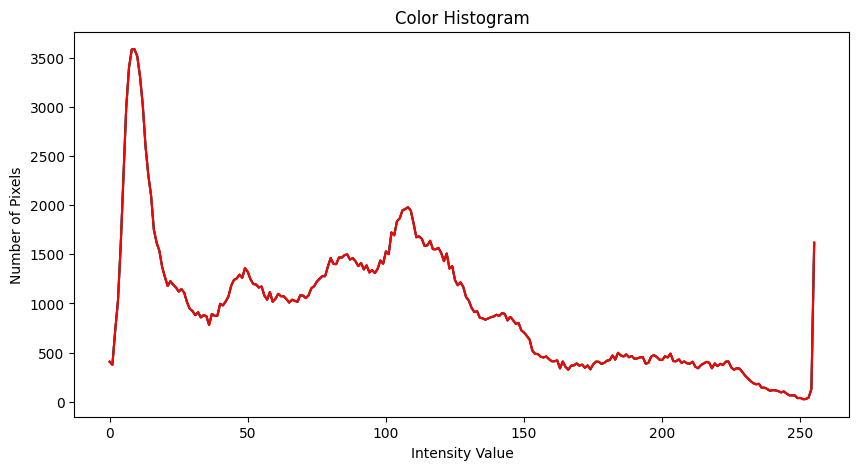

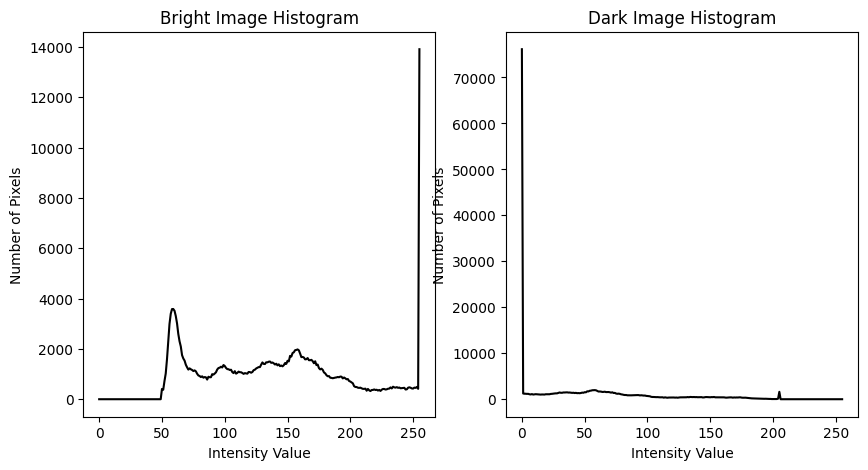

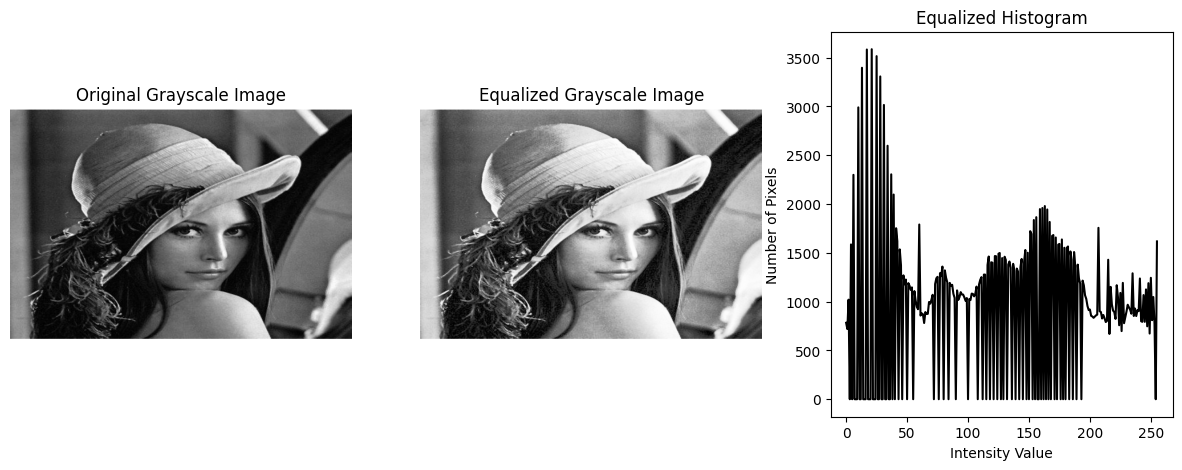

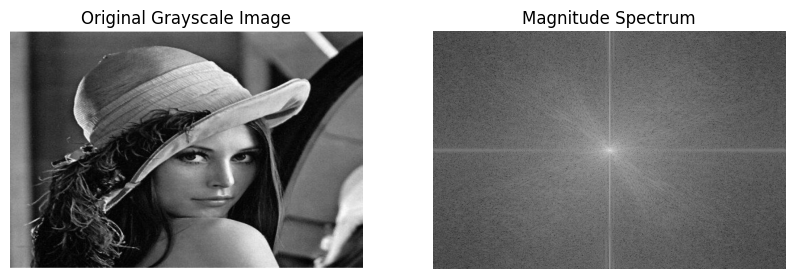

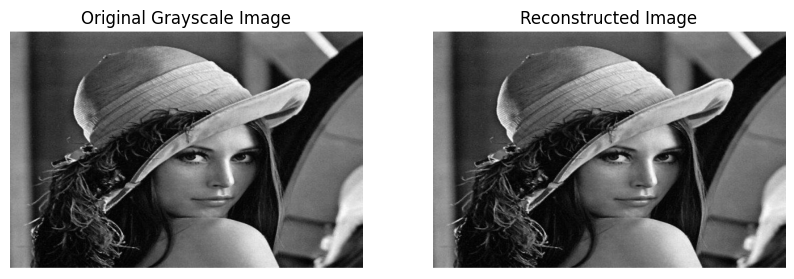

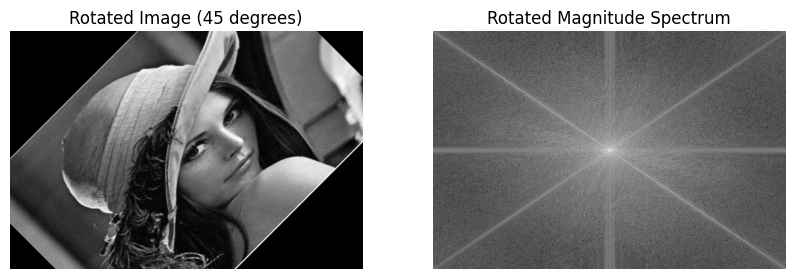

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Histogram Analysis and Equalization

# 1. Load the grayscale and color images
gray_image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)
color_image = cv2.imread('Image1.jpg')

# 2. Compute and display histograms for grayscale image
# Method 1: Histogram (x-axis: intensity, y-axis: number of pixels)
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_gray, color='black')
plt.title('Grayscale Histogram (Method 1)')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')

# Method 2: Normalized Histogram (x-axis: intensity, y-axis: probability)
hist_gray_norm = hist_gray / (gray_image.shape[0] * gray_image.shape[1])
plt.subplot(1, 2, 2)
plt.plot(hist_gray_norm, color='black')
plt.title('Grayscale Histogram (Method 2)')
plt.xlabel('Intensity Value')
plt.ylabel('Probability')
plt.show()

# 3. Compute and display histograms for color image
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 5))
for i, color in enumerate(colors):
    hist_color = cv2.calcHist([color_image], [i], None, [256], [0, 256])
    plt.plot(hist_color, color=color)
    plt.title('Color Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Number of Pixels')
plt.show()

# 4. Observe histogram changes for bright and dark images
# Brighten the grayscale image
bright_image = cv2.add(gray_image, 50)
hist_bright = cv2.calcHist([bright_image], [0], None, [256], [0, 256])

# Darken the grayscale image
dark_image = cv2.subtract(gray_image, 50)
hist_dark = cv2.calcHist([dark_image], [0], None, [256], [0, 256])

# Plot histograms for bright and dark images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_bright, color='black')
plt.title('Bright Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')

plt.subplot(1, 2, 2)
plt.plot(hist_dark, color='black')
plt.title('Dark Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.show()

# 5. Enhance contrast using histogram equalization
equalized_image = cv2.equalizeHist(gray_image)
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Display original and equalized images with histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.plot(hist_equalized, color='black')
plt.title('Equalized Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.show()

# Task 2: Fourier Transform and Inverse Fourier Transform

# 1. Compute the Fourier Transform (FFT) of a grayscale image
dft = np.fft.fft2(gray_image)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to the center
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

# Display the original image and its magnitude spectrum
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

# 2. Reconstruct the image using Inverse FFT (IFFT)
idft_shift = np.fft.ifftshift(dft_shift)  # Reverse the shift
idft = np.fft.ifft2(idft_shift)
reconstructed_image = np.abs(idft)

# Display the reconstructed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

# 3. Verify the Rotation Property of Fourier Transform
# Rotate the image by 45 degrees
rows, cols = gray_image.shape
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (cols, rows))

# Compute the FFT of the rotated image
dft_rotated = np.fft.fft2(rotated_image)
dft_rotated_shift = np.fft.fftshift(dft_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(dft_rotated_shift))

# Display the rotated image and its magnitude spectrum
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated Image (45 degrees)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.title('Rotated Magnitude Spectrum')
plt.axis('off')
plt.show()